In [ ]:
# 필요한 라이브러리 설치
!pip install pandas numpy pmdarima statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 27.0 MB/s eta 0:00:00


In [ ]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pmdarima import auto_arima  # ARIMA 모델 자동 선택
from statsmodels.tsa.arima.model import ARIMA  # ARIMA 모델 구현
from statsmodels.graphics.tsaplots import plot_predict  # 예측 시각화 도구

In [ ]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/Pierian-Data/AutoArima-Time-Series-Blog/master/Electric_Production.csv',
)

In [ ]:
df.head(12)

,DATE,IPG2211A2N
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151
5,1985-06-01,58.0904
6,1985-07-01,62.6202
7,1985-08-01,63.2485
8,1985-09-01,60.5846
9,1985-10-01,56.3154


In [ ]:
df.index

RangeIndex(start=0, stop=397, step=1)

In [ ]:
len(df)

397

In [ ]:
# 데이터 로딩
# index_col=0의 의미는? 첫 번째 열을 인덱스로 설정한다는 것
df = pd.read_csv(
    'https://raw.githubusercontent.com/Pierian-Data/AutoArima-Time-Series-Blog/master/Electric_Production.csv',
    index_col=0
)

In [ ]:
# IPG2211A2N:  가스 유틸리티 지수.
# 이 지수는 미국의 산업 생산 및 설비 가동률을 추적하는 광범위한 데이터 세트의 일부로, 제조업, 광업, 유틸리티 등 다양한 부문을 포괄
df.head(12)

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
1985-06-01,58.0904
1985-07-01,62.6202
1985-08-01,63.2485
1985-09-01,60.5846


In [ ]:
df.index

Index(['1985-01-01', '1985-02-01', '1985-03-01', '1985-04-01', '1985-05-01',
       '1985-06-01', '1985-07-01', '1985-08-01', '1985-09-01', '1985-10-01',
       ...
       '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
       '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01', '2018-01-01'],
      dtype='object', name='DATE', length=397)

In [ ]:
df.describe()

,IPG2211A2N
count,397.000000
mean,88.847218
std,15.387834
min,55.315100
25%,77.105200
50%,89.779500
75%,100.524400
max,129.404800


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397 entries, 1985-01-01 to 2018-01-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   IPG2211A2N  397 non-null    float64
dtypes: float64(1)
memory usage: 6.2+ KB


In [ ]:
# 인덱스를 날짜 형식으로 변환
df.index = pd.to_datetime(df.index)

In [ ]:
df.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [ ]:
df.describe()

,IPG2211A2N
count,397.000000
mean,88.847218
std,15.387834
min,55.315100
25%,77.105200
50%,89.779500
75%,100.524400
max,129.404800


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1985-01-01 to 2018-01-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   IPG2211A2N  397 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


In [ ]:
# rename IPG2211A2N to 'Energy Production'
df.columns = ['Energy Production']

In [ ]:
df.head()

,Energy Production
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


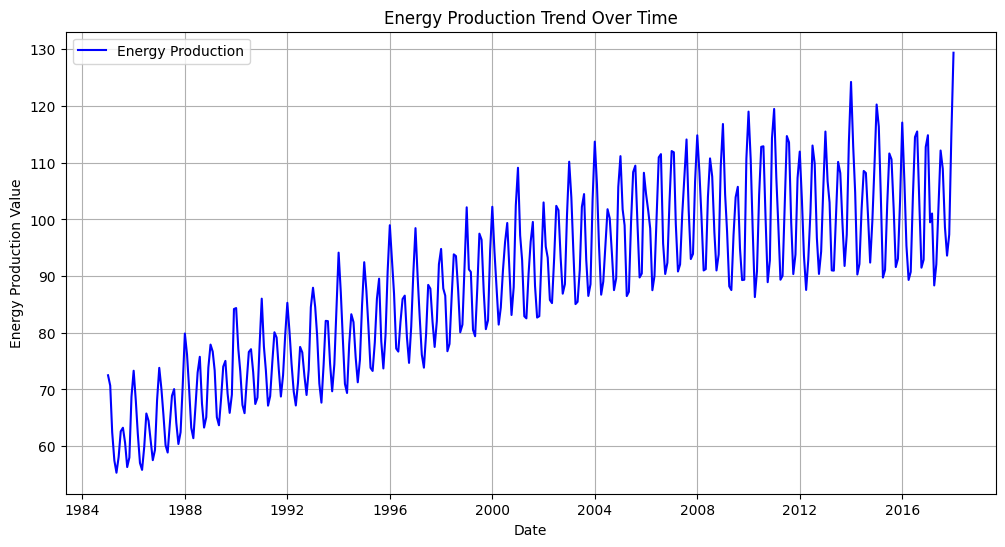

In [ ]:
# 시각화: IPG2211A2N 필드 값의 시간 흐름
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Energy Production'], label='Energy Production', color='blue')
plt.title('Energy Production Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Energy Production Value')
plt.legend()
plt.grid(True)
plt.show()

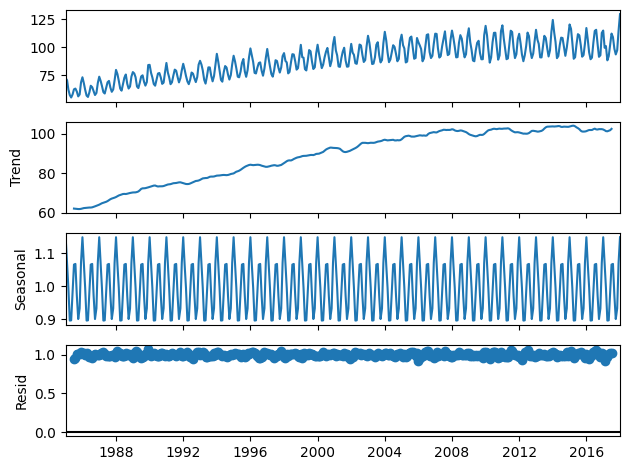

In [ ]:
# 계절성 분해를 위한 라이브러리
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df, model='multiplicative')   # 계절성 분해 (곱셈 모델 사용)
fig = result.plot()

In [ ]:
from pmdarima.arima import auto_arima

* df: ARIMA 모델을 적합시킬 시계열 데이터. pandas DataFrame이나 Series 형태일 수 있습니다.
* start_p와 start_q: 자동 ARIMA 과정이 시작할 AR(자기회귀) 및 MA(이동평균) 차수입니다.
* max_p와 max_q: 탐색할 최대 AR 및 MA 차수입니다. 이 범위 내에서 최적의 차수를 찾습니다.
* m: 계절성 주기를 지정합니다. 예를 들어, m=12는 연간 계절성을 의미합니다.
* start_P: 계절성 자기회귀 시작 차수입니다. 계절성 모델의 시작점을 지정합니다.
* seasonal: 계절성 여부를 나타내며, True일 경우 계절성 ARIMA 모델을 사용합니다.
* d와 D: 일반 차분(d)과 계절성 차분(D)의 차수입니다. 이 값들은 시계열을 정상 상태로 만들기 위해 필요한 차분의 횟수를 지정합니다.
* trace: True로 설정하면, 탐색 과정에서 고려되는 각 모델의 세부 정보와 메트릭을 출력합니다.
* error_action: 모델 탐색 중 오류가 발생했을 때 취할 행동을 지정합니다. 'ignore'는 오류를 무시하고 계속 진행합니다.
* suppress_warnings: 경고 메시지를 억제할지 여부를 결정합니다. True로 설정하면 경고 메시지가 출력되지 않습니다.
* stepwise: True일 경우, 단계적 탐색 알고리즘을 사용하여 모델을 선택합니다. 이 방법은 실행 시간을 단축시키면서도 대부분의 경우에 최적의 모델을 찾을 수 있습니다.

auto_arima 함수는 이러한 매개변수를 기반으로 최적의 모델 매개변수(AR, MA, 차분 차수)를 자동으로 선택하고, 선택된 최적의 모델을 stepwise_model 변수에 할당합니다. 이 모델은 이후 예측이나 분석에 사용할 수 있습니다. auto_arima는 시계열 분석을 단순화하고 자동화하여, 사용자가 수동으로 여러 ARIMA 모델을 비교하고 선택하는 데 드는 시간과 노력을 크게 줄여줍니다.

In [ ]:
# auto_arima는 모델 구조를 결정.
# - 데이터를 입력받아 최적의 하이퍼파라미터 p,d,q를 결정,
# - 계절성 모델(SARIMA)이라면 P, D, Q, m을 결정
# 이후의 fit 과정은 실제로 그 구조를 사용하여 모델을 훈련시킴
stepwise_model = auto_arima(df, start_p=1, start_q=1,  # df 대신에 뒤에 만들어진 훈련 데이터 train만 주는 것이 맞음
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1785.652, Time=2.97 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2010.162, Time=0.27 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1940.101, Time=1.35 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1835.298, Time=2.34 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,1,0)[12]             : AIC=inf, Time=1.45 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,1,1)[12]             : AIC=1787.226, Time=3.85 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,1,2)[12]             : AIC=1786.885, Time=6.04 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,1,0)[12]             : AIC=1872.182, Time=2.28 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,1,2)[12]             : AIC=1785.329, Time=3.93 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(2,1,2)[12]             : AIC=1770.670, Time=4.94 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(2,1,1)[12]             : AIC=1773.643, Time=4.30 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,1,2)[12]             : AIC=1814.635, Time=4.92 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,2)[12]             : AIC=1835.292, Time=3.52 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(2,1,2)[12]             : AIC=1772.091, Time=10.03 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(2,1,2)[12]             : AIC=1771.882, Time=5.16 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,1,2)[12]             : AIC=1852.611, Time=3.58 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(2,1,2)[12]             : AIC=1778.320, Time=5.30 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,1,2)[12]             : AIC=1811.649, Time=4.30 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(2,1,2)[12]             : AIC=1773.277, Time=9.02 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(2,1,2)[12] intercept   : AIC=1770.226, Time=14.49 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,1,2)[12] intercept   : AIC=1782.016, Time=13.10 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(2,1,1)[12] intercept   : AIC=1771.286, Time=9.08 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,1,1)[12] intercept   : AIC=inf, Time=7.12 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,1,2)[12] intercept   : AIC=1816.629, Time=5.08 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,2)[12] intercept   : AIC=1837.279, Time=5.84 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(2,1,2)[12] intercept   : AIC=1771.985, Time=16.60 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(2,1,2)[12] intercept   : AIC=1771.093, Time=14.02 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,1,2)[12] intercept   : AIC=1854.602, Time=3.86 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(2,1,2)[12] intercept   : AIC=1779.225, Time=12.30 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,1,2)[12] intercept   : AIC=1813.637, Time=5.46 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(2,1,2)[12] intercept   : AIC=inf, Time=15.49 sec

Best model:  ARIMA(1,1,1)(2,1,2)[12] intercept
Total fit time: 202.105 seconds


AIC(Akaike Information Criterion)는 통계 모델의 품질을 평가하는 데 사용되는 지표입니다. 모델의 복잡도와 데이터에 대한 적합도를 동시에 고려하여, 주어진 데이터 세트에 대한 모델의 상대적인 품질을 평가합니다. AIC는 일본의 통계학자 아카이케 히로쓰구(Hirotugu Akaike)에 의해 개발되었습니다.

모델 선택 시 AIC가 낮은 모델을 선호합니다. AIC 값이 낮다는 것은 모델이 데이터에 잘 적합되면서도 상대적으로 간단하다는 것을 의미합니다.

In [ ]:
stepwise_model.aic()

1770.2258363250214

In [ ]:
# 397개월의 데이터 중 372개월 데이터를 훈련으로 사용
# 사실 앞서 auto_arima를 호출할 때 데이터로 넘어간 df의 경우 훈련 데이터 만큼만 쓰는 것이 많음
train = df.loc['1985-01-01':'2015-12-01']

In [ ]:
# 마지막 37개월 데이터를 테스트로 사용
test = df.loc['2016-01-01':]

In [ ]:
stepwise_model.fit(train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(2, 1, 2, 12),
      suppress_warnings=True)

In [ ]:
future_forecast = stepwise_model.predict(n_periods=37)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
future_forecast

,0
2016-01-01,114.765490
2016-02-01,108.971457
2016-03-01,100.854456
2016-04-01,89.649688
2016-05-01,91.576317
2016-06-01,102.428605
2016-07-01,112.013584
2016-08-01,110.762668
2016-09-01,100.378866
2016-10-01,91.758580


In [ ]:
test

,Energy Production
DATE,
2016-01-01,117.0837
2016-02-01,106.6688
2016-03-01,95.3548
2016-04-01,89.3254
2016-05-01,90.7369
2016-06-01,104.0375
2016-07-01,114.5397
2016-08-01,115.5159
2016-09-01,102.7637


In [ ]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])

In [ ]:
future_forecast.head()

,Prediction
DATE,
2016-01-01,114.765490
2016-02-01,108.971457
2016-03-01,100.854456
2016-04-01,89.649688
2016-05-01,91.576317


In [ ]:
test

,Energy Production
DATE,
2016-01-01,117.0837
2016-02-01,106.6688
2016-03-01,95.3548
2016-04-01,89.3254
2016-05-01,90.7369
2016-06-01,104.0375
2016-07-01,114.5397
2016-08-01,115.5159
2016-09-01,102.7637


In [ ]:
pd.concat([test,future_forecast],axis=1)

,Energy Production,Prediction
DATE,,
2016-01-01,117.0837,114.765490
2016-02-01,106.6688,108.971457
2016-03-01,95.3548,100.854456
2016-04-01,89.3254,89.649688
2016-05-01,90.7369,91.576317
2016-06-01,104.0375,102.428605
2016-07-01,114.5397,112.013584
2016-08-01,115.5159,110.762668
2016-09-01,102.7637,100.378866
